# Universal Rabbit equations

In [260]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import ipywidgets as ipw

* [Equation for the model]:
* $\dot{N}_i = \delta_{i,0} \left(1-N_0\right)N_0 + \sum_j A_{i,j} N_i N_j - \Gamma_i N_i$, where $N_i$ is the number of individual of species $i$,  $\Gamma_i$ is the death rate of species $i$, $A$ is the feeding matrix.

In [411]:
def init_params(n_species, p_interact):
    A = np.zeros((n_species, n_species))
    gamma = np.zeros(n_species)

    mask = np.random.rand(n_species, n_species) < p_interact

    # all eating bunnies
    #A[0, 1:] = - np.ones(n_species-1)
    #A[1:, 0] = np.ones(n_species-1)

    gamma[1:] = np.random.rand()
    # relations between predators
    for i in range(0, n_species):
        for j in range(i+1, n_species):
            if mask[i, j]:
                A[j, i] = np.random.rand()
                A[i, j] = -1

    return A, gamma

def derivative(N, t, A, gamma, carrying_capacity):
    dotN = np.zeros(N.shape)
    dotN[0] = (1 - N[0]/carrying_capacity) * N[0]
    dotN += (A @ N) * N # transpose because it worked?!
    dotN -= gamma * N
    return dotN

In [427]:
seed = 40
np.random.seed(seed)

Nt = 2000
t_max = 400. # days
p_interact = 1.0
t = np.linspace(0.,t_max, Nt)
n_predators = 5
N0 = np.ones(n_predators + 1)
A, gamma = init_params(n_predators + 1, p_interact)
carrying_capacity = 1000

res = integrate.odeint(derivative, N0, t, args = (A, gamma, carrying_capacity))
N = res.T

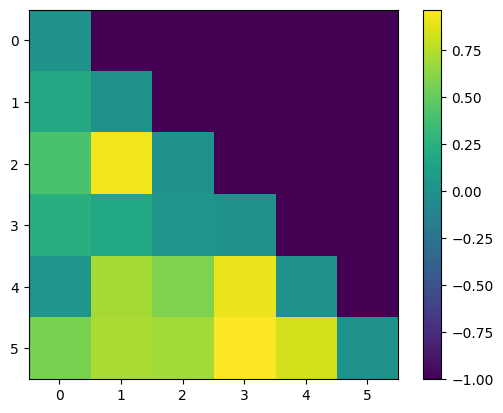

In [428]:
plt.imshow(A)
plt.colorbar()

In [429]:
N.shape

(6, 2000)

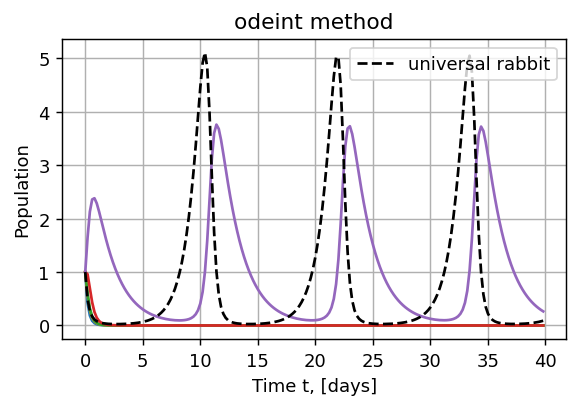

In [430]:
t_plot = 40

fig, ax = plt.subplots(1,1, figsize = (5,3), dpi=130)
plt.grid()
plt.title("odeint method")
plt.plot(t[t<t_plot], N[1:,t<t_plot].T)
plt.plot(t[t<t_plot], N[0,t<t_plot].T, '--', label = 'universal rabbit', color = 'k')
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

plt.show()

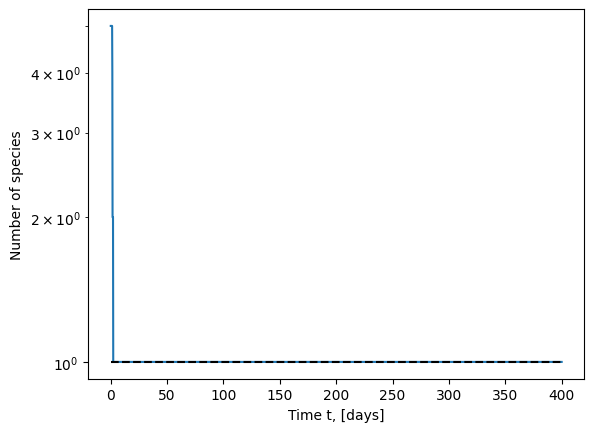

In [431]:
# number of species above a certain threshold
threshold = 0.01
n_species = np.sum(N[1:]>threshold, axis = 0)
plt.plot(t, n_species)
plt.xlabel('Time t, [days]')
plt.ylabel('Number of species')
plt.hlines(1, 0, t_max, linestyles = 'dashed', color = 'k')
plt.yscale('log')
plt.show()